[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.7_functional_api.ipynb)

In [1]:
import numpy as np
import tensorflow as tf

# 파일 경로 설정 (환경에 맞게 수정하세요)
mnist_path = '../dataset/mnist/mnist.npz'  # 윈도우 예시
#mnist_path = 'D:/datasets/mnist.npz'  # 윈도우 예시
# mnist_path = '/home/user/datasets/mnist.npz'  # 리눅스 예시

# npz 파일 직접 로드
with np.load(mnist_path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# 데이터 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

print("x_train[0, 10:15, 10:15] = " + repr(x_train[0, 10:15, 10:15]))
print("x_test[0, 10:15, 10:15] = " + repr(x_test[0, 10:15, 10:15]))


train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)
x_train[0, 10:15, 10:15] = array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])
x_test[0, 10:15, 10:15] = array([[0.        , 0.06666667, 0.25882353, 0.05490196, 0.2627451 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])


## Sequential API

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

## 7-1. Functional API

In [3]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [4]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


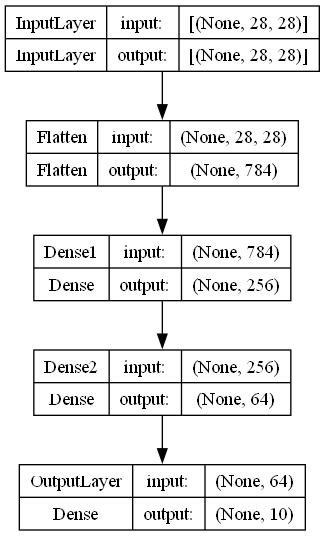

In [5]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [6]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9375
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9807
Functional Model] loss: 0.07336, acc: 0.97580


## 7-2. Model Subsclassing

In [7]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [8]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2126 - accuracy: 0.9368
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0620 - accuracy: 0.9801
Subclassing Model] loss: 0.07373, acc: 0.97870


## 7-3. 생성자 parameter를 활용한 생성

In [10]:
class MyModel(tf.keras.Model):
    
    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units // 4, activation='relu')  # ← 수정됨
        #self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [11]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
#mymodel(tf.keras.layers.Input(shape=(28, 28)))
# 모델 input 정의 (여기선 Input tensor를 주는 게 아니라 실제 값을 넣어야 동작함)
mymodel(tf.random.uniform((1, 28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2125 - accuracy: 0.9359
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0595 - accuracy: 0.9809
Subclassing Model w. parameters] loss: 0.07052, acc: 0.97800
